In [2]:
import numpy as np
import cv2

## Note that to load as color image pass cv2.IMREAD_COLOR or 1.
## to load as greyscale image pass cv2.IMREAD_GREYSCALE or 0.
## to load image as such including alpha channel pass cv2.IMREAD_UNCHANGED or -1.

#load an image in greyscale.
img = cv2.imread('C:\\Users\\himes\\Downloads\\myimg.jpeg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0) & 0xFF
cv2.destroyAllWindows()

cv2.waitKey() is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc which we will discuss below.

cv2.destroyAllWindows() simply destroys all the windows we created. If you want to destroy any specific window, use the function cv2.destroyWindow() where you pass the exact window name as the argument.

There is a special case where you can already create a window and load image to it later. In that case, you can specify whether window is resizable or not. It is done with the function cv2.namedWindow(). By default, the flag is cv2.WINDOW_AUTOSIZE. But if you specify flag to be cv2.WINDOW_NORMAL, you can resize window. It will be helpful when image is too large in dimension and adding track bar to windows.

In [4]:
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)
k = cv2.waitKey(0) & 0xFF
cv2.destroyAllWindows()

## Write an image
Use the function cv2.imwrite() to save an image.

First argument is the file name, second argument is the image you want to save.

In [3]:
img = cv2.imread('myimg.jpeg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()

In [5]:
import matplotlib.pyplot as plt

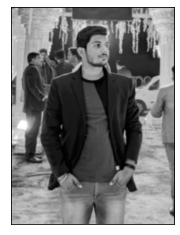

In [9]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [11]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

cap.read() returns a bool (True/False). If frame is read correctly, it will be True. So you can check end of the video by checking this return value.

Sometimes, cap may not have initialized the capture. In that case, this code shows error. You can check whether it is initialized or not by the method cap.isOpened(). If it is True, OK. Otherwise open it using cap.open().

You can also access some of the features of this video using cap.get(propId) method where propId is a number from 0 to 18. Each number denotes a property of the video (if it is applicable to that video) and full details can be seen here: Property Identifier. Some of these values can be modified using cap.set(propId, value). Value is the new value you want.

For example, I can check the frame width and height by cap.get(3) and cap.get(4). It gives me 640x480 by default. But I want to modify it to 320x240. Just use ret = cap.set(3,320) and ret = cap.set(4,240).

In [15]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        #frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()